In [1]:
!pip install transformers datasets torch


In [1]:
import random
import json
import pickle
import numpy as np
import tensorflow as tf
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gugan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gugan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gugan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))


In [4]:
with open(r"C:/Users/gugan/OneDrive/Desktop/Null_class_Project3/cs_ds_papers.json", "r") as file:
    data = json.load(file)

In [5]:
words = []
classes = []
documents = []
ignore_letters = ["?", "!", ".", ","]

# Process the JSON data
for entry in data:
    abstract = entry["abstract"]
    title = entry["title"]
    
    # Tokenize and process the abstract text
    word_list = nltk.word_tokenize(abstract)
    word_list = [lemmatizer.lemmatize(word.lower()) for word in word_list if word not in ignore_letters and word not in stop_words]
    words.extend(word_list)
    documents.append((word_list, title))
    if title not in classes:
        classes.append(title)

In [6]:
# Lemmatize and remove duplicates
words = sorted(set(words))

# Sort classes
classes = sorted(set(classes))

# Save words and classes for future use
pickle.dump(words, open("words.pkl", "wb"))
pickle.dump(classes, open("classes.pkl", "wb"))

In [7]:
training = []
output_empty = [0] * len(classes)

for document in documents:
    bag = []
    word_patterns = document[0]
    # Create a bag of words
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)

    # Create the output row
    output_row = list(output_empty)
    output_row[classes.index(document[1])] = 1
    training.append(bag + output_row)

# Shuffle and convert to NumPy array
random.shuffle(training)
training = np.array(training)

# Split into features and labels
train_X = training[:, : len(words)]
train_Y = training[:, len(words) :]

# Build the improved model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(len(train_X[0]),), activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(len(train_Y[0]), activation="softmax"),
])

c:\Users\gugan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Over 90 percent accuracy

In [8]:
# Compile the model with Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Train the model with early stopping and learning rate scheduling
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * (0.1 ** (epoch // 50)))

hist = model.fit(
    np.array(train_X), 
    np.array(train_Y), 
    epochs=400, 
    batch_size=5, 
    callbacks=[callback, lr_schedule], 
    verbose=1
)

# Save the model
model.save("chatbot_model.keras", hist)
print("Model training complete and saved!")

Epoch 1/400
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0204 - loss: 5.2744 - learning_rate: 0.0010
Epoch 2/400
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0075 - loss: 5.1720 - learning_rate: 0.0010
Epoch 3/400
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0765 - loss: 4.8408 - learning_rate: 0.0010
Epoch 4/400
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0907 - loss: 4.7319 - learning_rate: 0.0010
Epoch 5/400
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1243 - loss: 4.4953 - learning_rate: 0.0010
Epoch 6/400
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2087 - loss: 4.3413 - learning_rate: 0.0010
Epoch 7/400
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1765 - loss: 4.1006 - learning_rate: 0.0010
Epoch 8/400
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3383 - loss: 3.6148 - learning_rate: 0.0010
Epoch 9/400
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3750 - loss: 3.3449 - learning_rate: 0.0010
Epoch 10/4

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gugan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gugan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gugan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


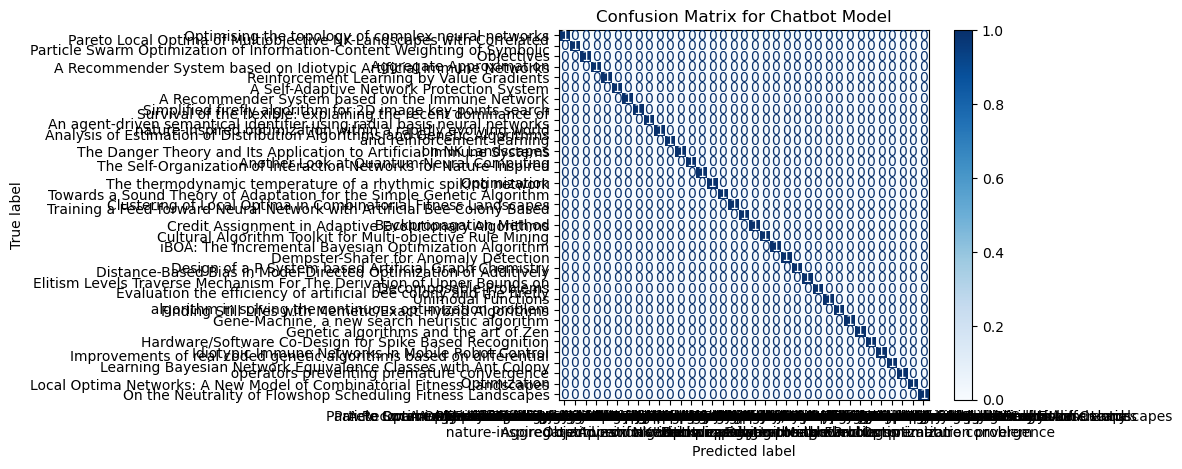

In [12]:
import numpy as np
import tensorflow as tf
import pickle
import nltk
import json
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Download necessary NLTK resources
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")

# Initialize the lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()
stop_words = set(nltk.corpus.stopwords.words("english"))

# Load the model and word/label pickle files
with open("words.pkl", "rb") as file:
    words = pickle.load(file)

with open("classes.pkl", "rb") as file:
    classes = pickle.load(file)

# Load the trained model
model = tf.keras.models.load_model("chatbot_model.keras")

# Load your JSON data
with open(r"C:/Users/gugan/OneDrive/Desktop/Null_class_Project3/cs_ds_papers.json", "r") as file:
    data = json.load(file)

# Prepare features and labels
X_data = []
Y_data = []

ignore_letters = ["?", "!", ".", ","]

# Tokenize and preprocess the data
for entry in data:
    abstract = entry["abstract"]
    title = entry["title"]
    
    # Tokenize and preprocess the abstract text
    word_list = nltk.word_tokenize(abstract)
    word_list = [lemmatizer.lemmatize(word.lower()) for word in word_list if word not in ignore_letters and word not in stop_words]
    
    # Prepare the feature set (bag of words)
    bag = [1 if word in word_list else 0 for word in words]
    X_data.append(bag)
    
    # Prepare the label (one-hot encoding for class)
    output = [0] * len(classes)
    output[classes.index(title)] = 1
    Y_data.append(output)

# Convert data to numpy arrays
X_data = np.array(X_data)
Y_data = np.array(Y_data)

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# Predict using the model
predictions = model.predict(X_test)

# Convert predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_test, axis=1)

# Create the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Get the classes that are present in both predicted and true labels
unique_classes = list(set(true_classes) | set(predicted_classes))

# Create the confusion matrix display with only relevant classes
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[classes[i] for i in unique_classes])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Chatbot Model")
plt.show()
